In [1]:
with open("day9.txt") as file:
    data = file.read().split("\n")
data = data[:-1]


In [2]:
%%time
#part1
datas = data.copy()
hb = [0,len(datas)-1]
bords = [0,len(datas[0])-1]
les_min = 0
coord_min = []
for i, ligne in enumerate(datas) : 

    for j, bit in enumerate(ligne) :
        if i not in hb and j not in bords:
            compare = {int(bit)
                       ,int(ligne[j-1])
                       ,int(ligne[j+1])
                       ,int(datas[i-1][j])
                       ,int(datas[i+1][j])}
        elif i in hb and j not in bords:
            if i ==0:
                compare = {int(bit)
                           ,int(ligne[j-1])
                           ,int(ligne[j+1])
                           ,int(datas[i+1][j])}
            else:
                compare = {int(bit)
                          ,int(ligne[j-1])
                          ,int(ligne[j+1])
                          ,int(datas[i-1][j])}
        elif j in bords and i not in hb:
            if j==0:
                compare = {int(bit)
                           ,int(ligne[j+1])
                           ,int(datas[i-1][j])
                           ,int(datas[i+1][j])}
            else:
                compare = {int(bit)
                           ,int(ligne[j-1])
                           ,int(datas[i-1][j])
                           ,int(datas[i+1][j])}
        else: #le bit est sur les coins
            if i ==0  and j==0:
                compare = {int(bit)
                       ,int(ligne[j+1])
                       ,int(datas[i+1][j])}
            elif i==0:
                compare = {int(bit)
                       ,int(ligne[j-1])        
                       ,int(datas[i+1][j])}
            elif j==0:
                compare = {int(bit)
                       ,int(ligne[j+1])
                       ,int(datas[i-1][j])}
            else:
                compare = {int(bit)
                       ,int(ligne[j-1])
                       ,int(datas[i-1][j])}
        
        if int(bit) == min(compare) and len(compare)>1:
            coord_min.append((i,j))
            les_min += int(bit)+1
les_min
            
    

CPU times: user 23 ms, sys: 1.26 ms, total: 24.2 ms
Wall time: 23.4 ms


491

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_array =[]
for ligne in data:
    data_array.append( [int(i) for i in ligne])
    
data_array = np.array(data_array)
        

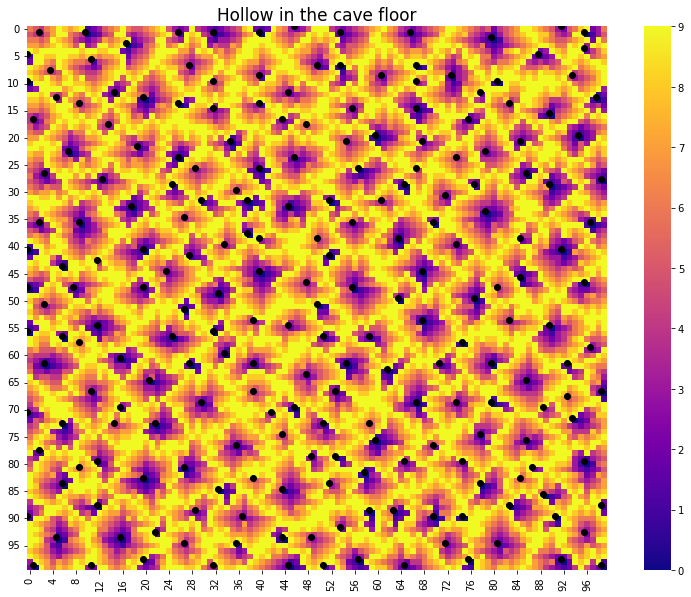

In [4]:
df = pd.DataFrame(data_array, columns = range(0,len(data[0])),
  index = range(0,len(data)))
ax = plt.axes()
sns.heatmap(df, annot = False, cbar = True, cmap = 'plasma',ax=ax)
ax.set_title("Hollow in the cave floor",size=17)
for (i,j) in coord_min:
    plt.scatter(x=j,y=i,color="black")

plt.gcf().set_size_inches(13, 10)

In [5]:
#i=n° ligne
#j =n° colonne
def return_voisin(i,j):
    cord ={(i-1,j),(i+1,j),(i,j-1),(i,j+1)}
    if i not in [0,99] and j not in [0,99]:
        voisins =[(I,J) for (I,J) in cord if int(data[I][J])!=9]
    elif i in [0,99] and j not in [0,99]:
        if i==0 :
            voisins = [(I,J) for (I,J) in cord.difference({(i-1,j)}) if int(data[I][J])!=9]
        else:
            voisins = [(I,J) for (I,J) in cord.difference({(i+1,j)}) if int(data[I][J])!=9]
    elif i not in [0,99] and j  in [0,99]:
        if j==0:
            voisins = [(I,J) for (I,J) in cord.difference({(i,j-1)}) if int(data[I][J])!=9]
        else:
            voisins = [(I,J) for (I,J) in cord.difference({(i,j+1)}) if int(data[I][J])!=9]
            
    else:
        if i==0 and j==0:
            voisins = [(I,J) for (I,J) in cord.difference(set([(i,j-1),(i-1,j)])) if int(data[I][J])!=9]
        elif i==0 and j==99:
            voisins = [(I,J) for (I,J) in cord.difference(set([(i,j+1),(i-1,j)])) if int(data[I][J])!=9]
        elif i==99 and j==0:
            voisins = [(I,J) for (I,J) in cord.difference(set([(i,j-1),(i+1,j)])) if int(data[I][J])!=9]
        else:
            voisins = [(I,J) for (I,J) in cord.difference(set([(i,j+1),(i+1,j)])) if int(data[I][J])!=9]
    
    return set(voisins)



def get_size(i,j):
    explored = {(i,j)}
    v = return_voisin(i,j)
    while explored.union(v)!=explored:
        v_ = set()
        for (i,j) in v:
            v_.update(return_voisin(i,j))
        explored.update(v)
        v = v_.difference(v)
    return len(explored)
    
            
    

In [6]:
%%time
fosses = []

for (i,j) in coord_min:
    
    fosses.append(get_size(i,j))
 
fosses=pd.Series(fosses)
fosse = fosses.sort_values(ascending=False)[:3]
produit=1
for i in fosse:
    produit *=i
produit

CPU times: user 45.3 ms, sys: 2.2 ms, total: 47.5 ms
Wall time: 45.9 ms


1075536